In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [34]:
data = pd.read_csv("D:\Python\ML\Loan-repayment-prediciton\loan_data_final.csv")

In [35]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [36]:
data.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,all_other,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [37]:
data['purpose'].unique()

array(['debt_consolidation', 'all_other', 'small_business', 'educational'],
      dtype=object)

In [38]:

for i in range(len(data)):
    if data.loc[i, 'purpose'] == "debt_consolidation":
        data.loc[i, 'purpose_encoded'] = 1
    elif data.loc[i, 'purpose'] == "all_other":
        data.loc[i, 'purpose_encoded'] = 2
    elif data.loc[i, 'purpose'] == "small_business":
        data.loc[i, 'purpose_encoded'] = 3
    elif data.loc[i, 'purpose'] == "educational":
        data.loc[i, 'purpose_encoded'] = 4



In [39]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1.0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,2.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1.0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,2.0


In [40]:
data.corr()

C:\Users\papir\AppData\Local\Temp\ipykernel_7524\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.030436
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.041973
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.106956
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.012344
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.160431
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.117404
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.003625
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.006321
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.188476
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.055922


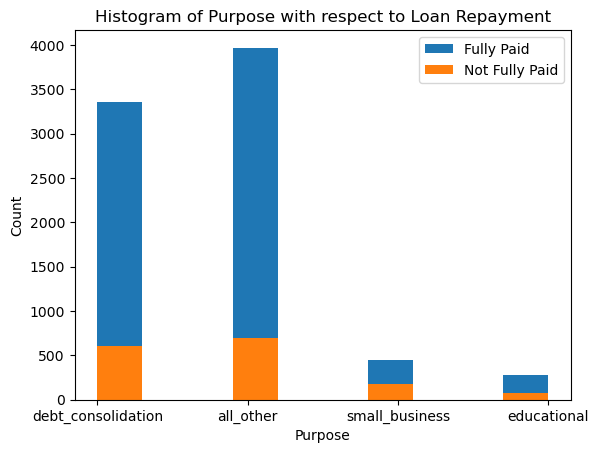

In [44]:
plt.hist(data[data["not.fully.paid"] == 0]["purpose"], label="Fully Paid")
plt.hist(data[data["not.fully.paid"] == 1]["purpose"], label="Not Fully Paid")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.title("Histogram of Purpose with respect to Loan Repayment")
plt.legend()
plt.show()

In [45]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1.0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,2.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1.0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,2.0


In [51]:
n_data = data.drop(columns="purpose",axis=0)

In [52]:
n_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,2.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,2.0


In [53]:
X = n_data.drop(columns="not.fully.paid")
Y = n_data['not.fully.paid']


In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [54]:
scaler = StandardScaler()

In [56]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.48976958,  0.22967835, -0.95623521, ..., -0.30275411,
        -0.23892836, -0.98165419],
       [ 0.48976958,  0.36076956, -0.5599826 , ..., -0.30275411,
        -0.23892836,  0.39830171],
       [ 0.48976958,  0.81022514, -0.46805858, ..., -0.30275411,
        -0.23892836,  3.1582135 ],
       ...,
       [ 0.48976958,  1.28215351,  1.85074401, ..., -0.30275411,
        -0.23892836, -0.98165419],
       [ 0.48976958, -0.29094103, -0.10467753, ..., -0.30275411,
        -0.23892836, -0.98165419],
       [ 0.48976958, -0.41828678, -0.68041469, ..., -0.30275411,
        -0.23892836,  1.7782576 ]])

In [61]:
model = LogisticRegression()

In [62]:
model.fit(X_train,Y_train)

LogisticRegression()

In [63]:
prediction = model.predict(X_test)

In [65]:
acc_score = accuracy_score(prediction,Y_test)

In [66]:
print(acc_score)

0.8347251217814892


In [71]:
model2 = DecisionTreeClassifier()

In [80]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[0,5,10,20],
    'min_samples_split':[2,5,10,15],
    'min_samples_leaf':[1,2,4,6]
}

gridsearch = GridSearchCV(model2,params,cv=5)
gridsearch.fit(X_train,Y_train)

C:\Users\papir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\papir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\papir\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\papir\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\papir\anaconda3\lib\site-packages\sklearn\base.py", lin

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]})

In [82]:
best_params = gridsearch.best_params_

In [83]:
bestModel = DecisionTreeClassifier(**best_params)

In [85]:
bestModel.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [86]:
pred = bestModel.predict(X_test)
print(accuracy_score(pred,Y_test))

0.8281141266527487


In [91]:
cross_scores = cross_val_score(model,X,Y,cv=5)
print(cross_scores)

[0.83977035 0.83977035 0.83977035 0.84020888 0.7305483 ]


C:\Users\papir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\papir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [92]:
mean_acc = cross_scores.mean()

In [93]:
print(mean_acc)

0.8180136489749641
